Init:

In [107]:
from matplotlib import pyplot
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Process the Trips CSV file
trips_df = pd.read_csv("../ferry_tips_data.csv")


Filter for only line 17

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep t

<Axes: title={'center': 'Cars carried on 2024-02-11'}, xlabel='time_departure'>

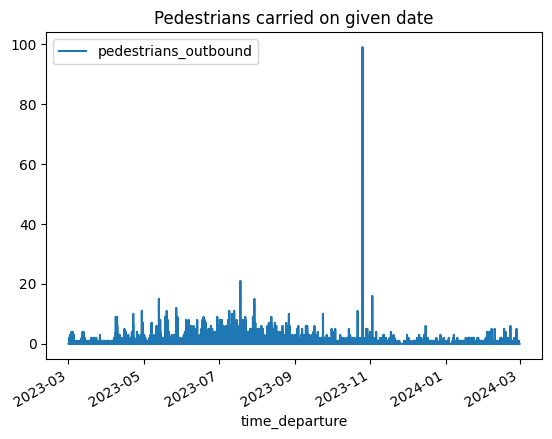

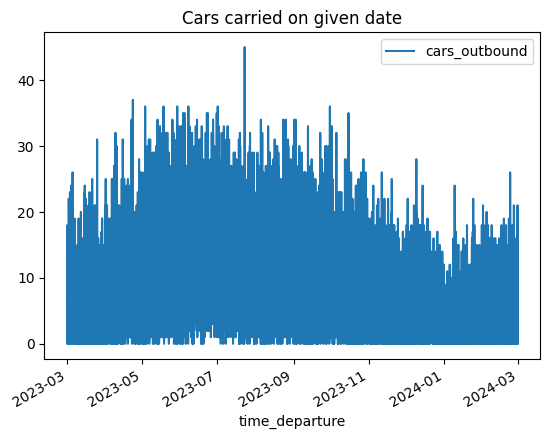

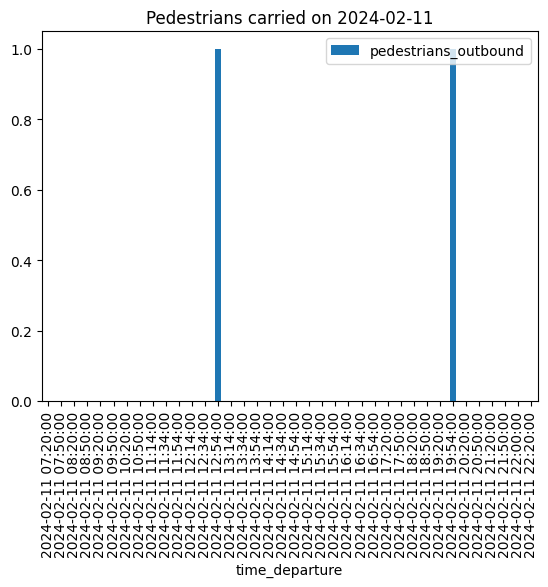

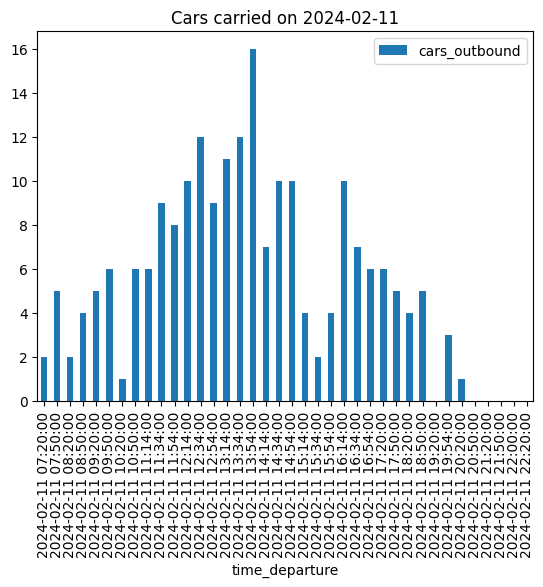

In [108]:
route17 = trips_df[trips_df["route_id"] == 17] # Filter for line 

#make date good
route17.loc[: ,"time_departure"] = route17["time_departure"].apply(lambda x: datetime.datetime.fromisoformat(x))

route17.plot(x= "time_departure", y="pedestrians_outbound", title="Pedestrians carried on given date")
route17.plot(x= "time_departure", y="cars_outbound", title="Cars carried on given date")

#filter for a random day
route17day = route17[route17["time_departure"] > datetime.datetime(2024, 2, 11)]
route17day = route17day[route17day["time_departure"] < datetime.datetime(2024, 2, 12)]

route17day.plot(kind= "bar", x= "time_departure", y="pedestrians_outbound", title="Pedestrians carried on 2024-02-11")
route17day.plot(kind= "bar", x= "time_departure", y="cars_outbound", title="Cars carried on 2024-02-11")

Average Number of Pedestrians Per Day for Each Route:
route_id
12     10.096685
16      5.388889
17     11.926230
21    154.349727
38    122.150000
Name: pedestrians_outbound, dtype: float64


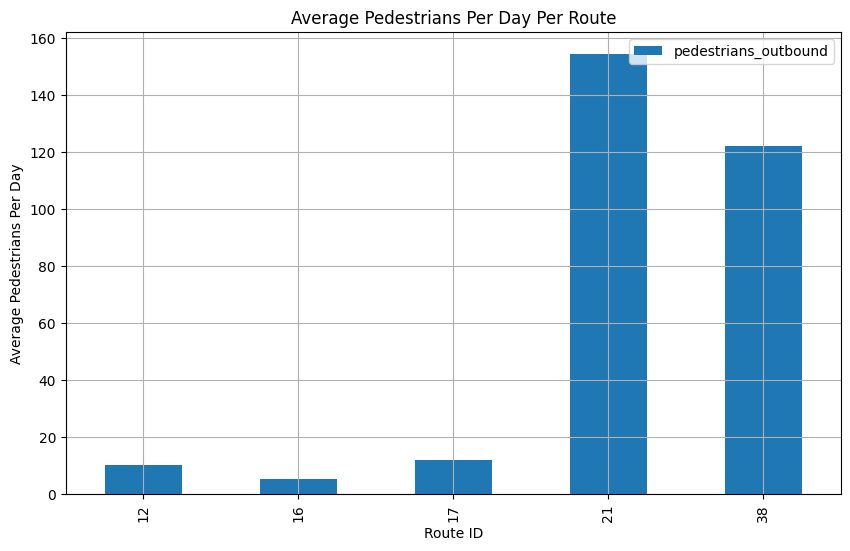

In [109]:
# List of selected routes
selected_routes = [17, 16, 12, 21, 38]
trips_df = trips_df[trips_df["route_id"].isin(selected_routes)]

# Convert "time_departure" column to datetime
trips_df["time_departure"] = pd.to_datetime(trips_df["time_departure"], errors="coerce")

# Create the "date" column
trips_df["date"] = trips_df["time_departure"].dt.date

# Group by route_id and date, summing together pedestrians per day
pedestrians_per_day = trips_df.groupby(["route_id", "date"])["pedestrians_outbound"].sum().reset_index()

# Calculate the average number of pedestrians per day for each route
average_pedestrians_per_day_per_route = pedestrians_per_day.groupby("route_id")["pedestrians_outbound"].mean()

# Show the results
print("Average Number of Pedestrians Per Day for Each Route:")
print(average_pedestrians_per_day_per_route)

# Plot the graph
average_pedestrians_per_day_per_route.plot(kind="bar", title="Average Pedestrians Per Day Per Route", figsize=(10, 6))
plt.xlabel("Route ID")
plt.ylabel("Average Pedestrians Per Day")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


Average Motorcyles Per Day Per Route:
route_id
12     1.135359
16     3.025926
17    11.786885
21    12.491803
38     1.469444
Name: motorcycles_outbound, dtype: float64


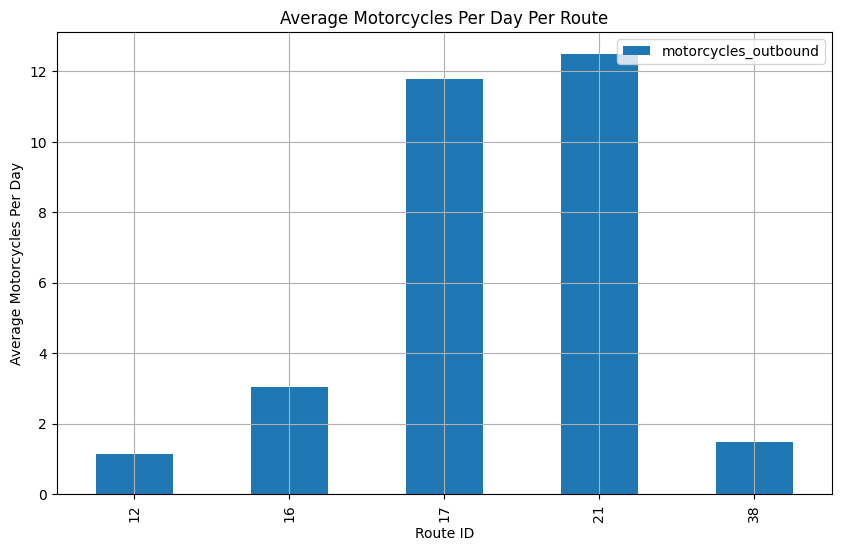

In [110]:
# Group by route_id and date, summing together motorcycles per day
motorcycles_per_day = trips_df.groupby(["route_id", "date"])["motorcycles_outbound"].sum().reset_index()

# Calculate the daily average for motorcycles per route
average_motorcycles_per_day = motorcycles_per_day.groupby("route_id")["motorcycles_outbound"].mean()

# Show results
print("Average Motorcyles Per Day Per Route:")
print(average_motorcycles_per_day)

# Plot the graph
plt.figure(figsize=(10, 6))
average_motorcycles_per_day.plot(kind="bar", label="motorcycles_outbound")
plt.title("Average Motorcycles Per Day Per Route")
plt.xlabel("Route ID")
plt.ylabel("Average Motorcycles Per Day")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


Average Cars Per Day Per Route:
route_id
12    560.058011
16    861.329630
17    411.726776
21    712.038251
38    185.669444
Name: cars_outbound, dtype: float64


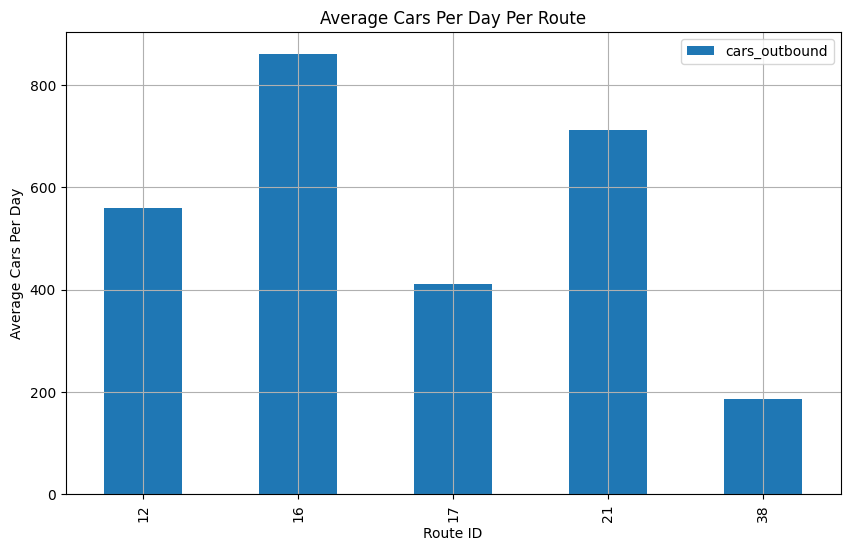

In [111]:
# Group by route_id and date, summing together cars per day
cars_per_day = trips_df.groupby(["route_id", "date"])["cars_outbound"].sum().reset_index()

# Calculate the daily average for cars per route
average_cars_per_day = cars_per_day.groupby("route_id")["cars_outbound"].mean()

# Show results
print("Average Cars Per Day Per Route:")
print(average_cars_per_day)

# Plot the graph
average_cars_per_day.plot(kind="bar", title="Average Cars Per Day Per Route", figsize=(10, 6))
plt.xlabel("Route ID")
plt.ylabel("Average Cars Per Day")
plt.legend(loc="upper right") 
plt.grid(True)
plt.show()


Average Trucks Per Day Per Route:
route_id
12    35.439227
16    62.181481
17    21.639344
21    30.218579
38    13.958333
Name: trucks_outbound, dtype: float64


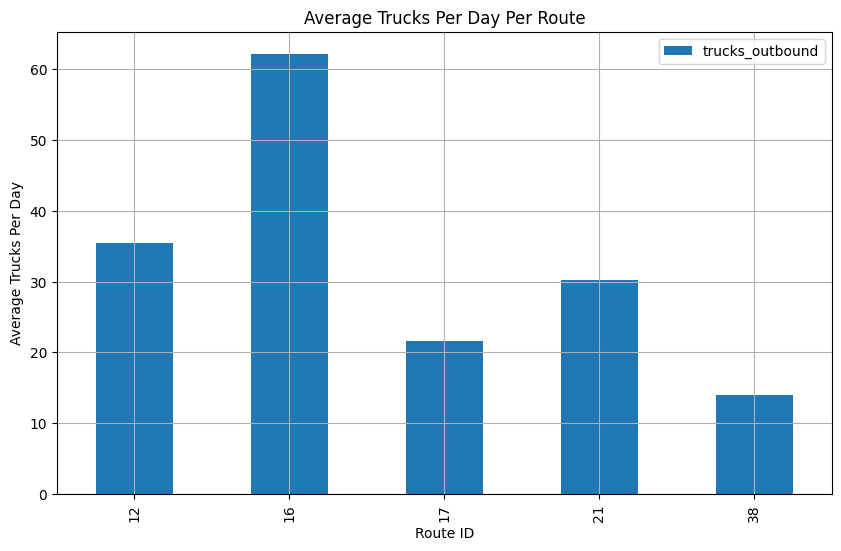

In [112]:
# Group by route_id and date, summing together trucks per day
trucks_per_day = trips_df.groupby(["route_id", "date"])["trucks_outbound"].sum().reset_index()

# Calculate the daily average for trucks per route
average_trucks_per_day = trucks_per_day.groupby("route_id")["trucks_outbound"].mean()

# Show the result
print("Average Trucks Per Day Per Route:")
print(average_trucks_per_day)

# Plot the graph
average_trucks_per_day.plot(kind="bar", title="Average Trucks Per Day Per Route", figsize=(10, 6))
plt.xlabel("Route ID")
plt.ylabel("Average Trucks Per Day")
plt.legend(loc="upper right")  # Adds the legend
plt.grid(True)
plt.show()


Average Trucks with Trailers Per Day Per Route:
route_id
12    3.571823
16    3.518519
17    1.852459
21    1.726776
38    0.602778
Name: trucks_with_trailer_outbound, dtype: float64


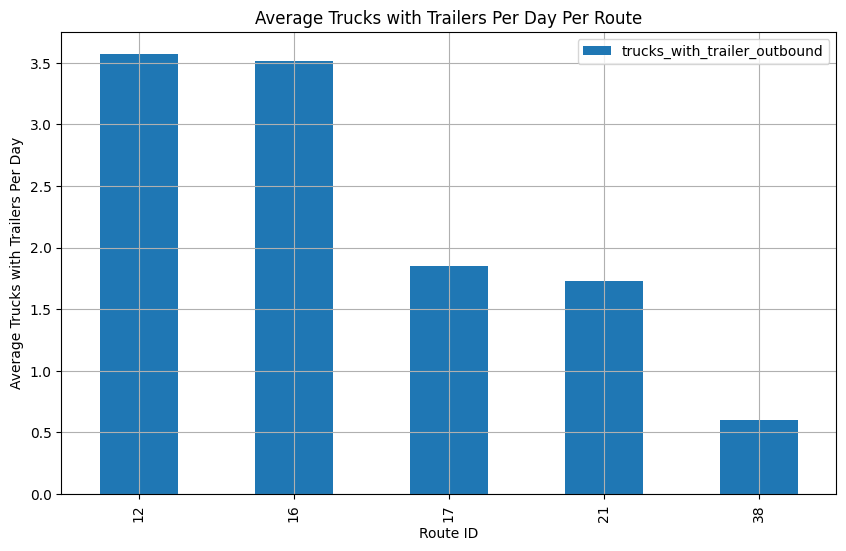

In [113]:
# Group by route_id and date, summing together trucks with trailers per day
trucks_with_trailers_per_day = trips_df.groupby(["route_id", "date"])["trucks_with_trailer_outbound"].sum().reset_index()

# Calculate the daily average for trucks with trailers per route
average_trucks_with_trailers_per_day = trucks_with_trailers_per_day.groupby("route_id")["trucks_with_trailer_outbound"].mean()

# Show the graph
print("Average Trucks with Trailers Per Day Per Route:")
print(average_trucks_with_trailers_per_day)

# Plot the graph
average_trucks_with_trailers_per_day.plot(kind="bar", title="Average Trucks with Trailers Per Day Per Route", figsize=(10, 6))
plt.xlabel("Route ID")
plt.ylabel("Average Trucks with Trailers Per Day")
plt.legend(loc="upper right") 
plt.grid(True)
plt.show()


Average Busses Per Day for Each Route:
route_id
12    11.132597
16    11.614815
17     0.150273
21     7.915301
38     0.025000
Name: buses_outbound, dtype: float64


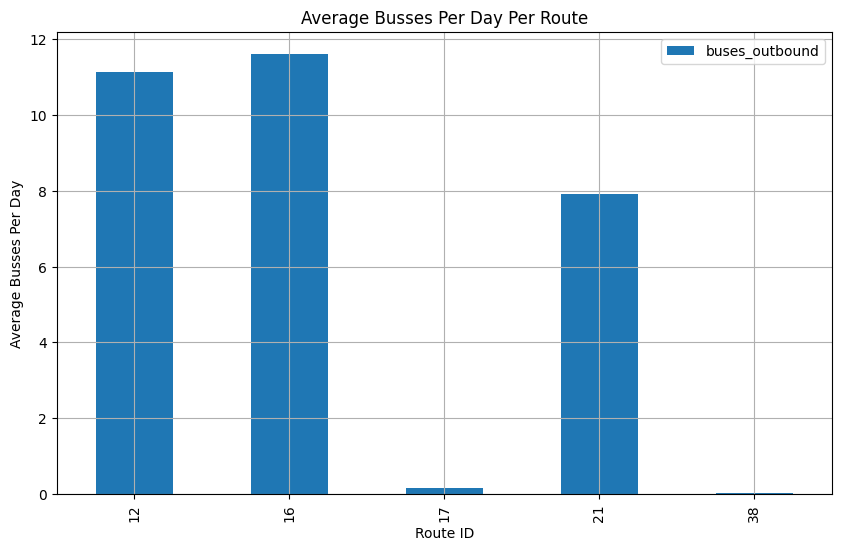

In [114]:
# Group by route_id and date, summing together buses per day
buses_per_day = trips_df.groupby(["route_id", "date"])["buses_outbound"].sum().reset_index()

# Calculate the daily average for buses per route
average_buses_per_day = buses_per_day.groupby("route_id")["buses_outbound"].mean()

# Show the result
print("Average Busses Per Day for Each Route:")
print(average_buses_per_day)

# Plot the graph
average_buses_per_day.plot(kind="bar", title="Average Busses Per Day Per Route", figsize=(10, 6))
plt.xlabel("Route ID")
plt.ylabel("Average Busses Per Day")
plt.legend(loc="upper right")  
plt.grid(True)
plt.show()
